<a href="https://colab.research.google.com/github/ZackPashkin/colab-snippets-ngrok-flask/blob/main/How_to_display_an_image_grid_flask_ngrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is ngrok? 
Securely expose a local web server to the internet and capture all traffic for detailed inspection and replay. ngrok is a reverse proxy that creates a secure tunnel between from a public endpoint to a locally running web service. ngrok captures and analyzes all traffic over the tunnel for later inspection and replay.



In [ ]:
# installation
!pip install flask==0.12.2
!pip install flask-ngrok

     |████████████████████████████████| 92kB 3.6MB/s 
  Found existing installation: Flask 1.1.2
    Uninstalling Flask-1.1.2:
      Successfully uninstalled Flask-1.1.2


In [ ]:
# dataset example
!gdown https://drive.google.com/uc?id=1zv-9NHLLzWCANumdsNtwDK1WV549b270 
!mkdir /content/static
!unzip -qq /content/test.zip -d /content/static

Downloading...
From: https://drive.google.com/uc?id=1zv-9NHLLzWCANumdsNtwDK1WV549b270
To: /content/test.zip
295MB [00:02, 142MB/s]


In [ ]:
!mkdir templates
%cd /content/templates

html = """
<!DOCTYPE html>
<html>
<head>
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
* {
  box-sizing: border-box;
}

body {
  margin: 0;
  font-family: Arial, Helvetica, sans-serif;
}

.header {
  text-align: center;
  padding: 32px;
}

.row {
  display: -ms-flexbox; /* IE 10 */
  display: flex;
  -ms-flex-wrap: wrap; /* IE 10 */
  flex-wrap: wrap;
  padding: 0 4px;
}

/* Create two equal columns that sits next to each other */
.column {
  -ms-flex: 50%; /* IE 10 */
  flex: 50%;
  padding: 0 4px;
}

.column img {
  margin-top: 8px;
  vertical-align: middle;
}

/* Style the button */
.btn {
  border: none;
  outline: none;
  padding: 10px 16px;
  background-color: #f1f1f1;
  cursor: pointer;
  font-size: 18px;
}

.btn:hover {
  background-color: #ddd;
}

.btn.active {
  background-color: #666;
  color: white;
}
</style>
</head>
<body>

<!-- Header -->
<div class="header" id="myHeader">
  <h1>Image Grid</h1>
  <p>Hello World</p>
  <button class="btn" onclick="one()">Show images</button>
</div>

<!-- Photo Grid -->
<div class="row"> 
  <div class="column">
    {% for name in user_image %}
    <img src="{{name}}" style="width:30%">
{% endfor %}
  </div>
</div>
<script>

</body>
</html>
"""

with open("index.html","a+") as f:
  f.write(html)

%cd /content

/content/templates
/content


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask,render_template
import os

IMAGE_FOLDER = os.path.join('static', 'test')

app = Flask(__name__)

#starts ngrok when the app is run
run_with_ngrok(app)   



@app.route("/")
def home():
    # display image grid
    full_filename_list = [os.path.join(IMAGE_FOLDER,i) for i in os.listdir(IMAGE_FOLDER)[:7]]
    return render_template("index.html", user_image = full_filename_list)
app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://dff204111565.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [04/Mar/2021 18:42:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 18:42:36] "GET /static/test/28495189.jpg HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 18:42:36] "GET /static/test/470638774.jpg HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 18:42:36] "GET /static/test/4672800435.jpg HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 18:42:36] "GET /static/test/433031123.jpg HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 18:42:36] "GET /static/test/51315775.jpg HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 18:42:36] "GET /static/test/4248629085.jpg HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 18:42:37] "GET /static/test/5945198746.jpg HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 18:42:37] "GET /favicon.ico HTTP/1.1" 404 -


## Page should look like

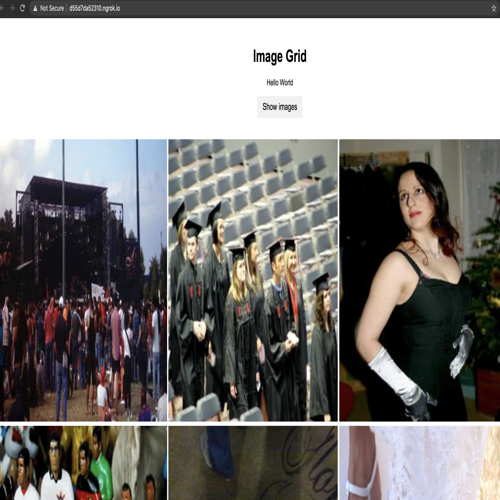